# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline


In [2]:
#raw output of the data file
df_raw = pd.read_csv('kc_house_data.csv')

In [3]:
# create clean dataframe
df_clean = pd.DataFrame()

In [4]:
#split up the data field analysis

df_raw.columns
jon_columns = df_raw.columns[1:11]
ryan_columns = df_raw.columns[11:]

print("jon to do: \n" + ", ".join(jon_columns))
print('\n')
print("ryan to do: \n" + ", ".join(ryan_columns))

jon to do: 
date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition


ryan to do: 
grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15


In [5]:
# next line is only for sandbox:
df_clean = pd.DataFrame()

# data field: Date

# needs to cast astype datetime64
# minimum is 5/2/2014
# maximum is 5/27/2015
# add columns calculated from date: month, day, dayofweek


orig_field = 'date'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean['date'] = df_raw['date'].astype('datetime64')
print('converted date to datetime64')

df_clean['month'] = df_clean.date.map(lambda x: x.month)
print('added field: month')

df_clean['dayofweek'] = df_clean.date.map(lambda x: x.dayofweek)
print('added field: dayofweek')

df_clean['day'] = df_clean.date.map(lambda x: x.day)
print('added field: day')



0 missing values in date
0% missing values in date
372 unique count
21225 non-unique count


converted date to datetime64
added field: month
added field: dayofweek
added field: day


In [6]:
# next line is only for sandbox:
df_clean = pd.DataFrame()

# data field: id



orig_field = 'id'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = df_raw[orig_field]

df_clean.describe()


0 missing values in id
0% missing values in id
21420 unique count
177 non-unique count




,id
count,2.159700e+04
mean,4.580474e+09
std,2.876736e+09
min,1.000102e+06
25%,2.123049e+09
50%,3.904930e+09
75%,7.308900e+09
max,9.900000e+09


In [7]:
# Duplicate records by ID
# appear to be the same house sold on different dates, confirm in next cell
df_raw[pd.DataFrame.duplicated(df_raw, ['id'], keep=False)].sort_values('id')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
11422,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
11421,109200390,8/20/2014,245000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
12406,123039336,12/8/2014,244900.0,1,1.00,620,8261,1.0,0.0,0.0,...,5,620,0.0,1939,NaN,98106,47.5138,-122.364,1180,8244
12405,123039336,6/11/2014,148000.0,1,1.00,620,8261,1.0,0.0,0.0,...,5,620,0.0,1939,0.0,98106,47.5138,-122.364,1180,8244
7786,251300110,1/14/2015,358000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,8,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017
7785,251300110,7/31/2014,225000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,8,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017


In [8]:
# Duplicate records by ID and Date solde
# confirmed that there is no duplicate record for a single sale
df_raw[pd.DataFrame.duplicated(df_raw, ['id', 'date'], keep=False)].sort_values('id')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [9]:
# next line is only for sandbox:
df_clean = pd.DataFrame()

# data field: price



orig_field = 'price'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = df_raw[orig_field]

df_clean.describe()

0 missing values in price
0% missing values in price
3622 unique count
17975 non-unique count




,price
count,2.159700e+04
mean,5.402966e+05
std,3.673681e+05
min,7.800000e+04
25%,3.220000e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


In [10]:
# next line is only for sandbox:
df_clean = pd.DataFrame()

# data field: id



orig_field = 'bedrooms'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = np.where(df_raw[orig_field]==33, 4, df_raw[orig_field])
print("replaced incorrect value of 33 with imputed value of 4")

df_clean.describe()

0 missing values in bedrooms
0% missing values in bedrooms
12 unique count
21585 non-unique count


replaced incorrect value of 33 with imputed value of 4


,bedrooms
count,21597.000000
mean,3.371857
std,0.904103
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,11.000000


In [11]:
df_raw[df_raw.bedrooms>df_raw.bedrooms.quantile(.9999)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


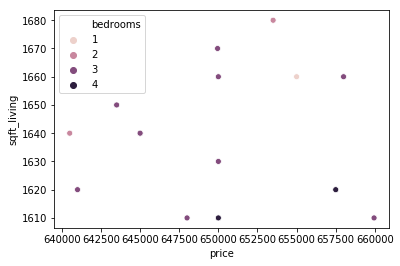

In [12]:
df_subset = df_raw[(df_raw.bedrooms < 10) &
                   (df_raw.price > 640000) &
                   (df_raw.price < 660000) &
                   (df_raw.sqft_living > 1600) &
                   (df_raw.sqft_living < 1700)]

sns.scatterplot(x='price', y='sqft_living', hue='bedrooms', data=df_subset)

In [13]:
df_raw.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [14]:
# next line is only for sandbox:
df_clean = pd.DataFrame()

# data field: bathroomsNumber


orig_field = 'bathrooms'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = df_raw[orig_field]

df_clean.describe()
#df_clean[orig_field].hist()

0 missing values in bathrooms
0% missing values in bathrooms
29 unique count
21568 non-unique count




,bathrooms
count,21597.000000
mean,2.115826
std,0.768984
min,0.500000
25%,1.750000
50%,2.250000
75%,2.500000
max,8.000000


In [15]:
# next line is only for sandbox:
df_clean = pd.DataFrame()

# data field: sqft_living


orig_field = 'sqft_living'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = df_raw[orig_field]

df_clean.describe()
#df_clean[orig_field].hist()

0 missing values in sqft_living
0% missing values in sqft_living
1034 unique count
20563 non-unique count




,sqft_living
count,21597.000000
mean,2080.321850
std,918.106125
min,370.000000
25%,1430.000000
50%,1910.000000
75%,2550.000000
max,13540.000000


In [16]:
# next line is only for sandbox:
df_clean = pd.DataFrame()

# data field: sqft_living


orig_field = 'sqft_lot'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = df_raw[orig_field]

df_clean.describe()
#df_clean[orig_field].hist()

0 missing values in sqft_lot
0% missing values in sqft_lot
9776 unique count
11821 non-unique count




,sqft_lot
count,2.159700e+04
mean,1.509941e+04
std,4.141264e+04
min,5.200000e+02
25%,5.040000e+03
50%,7.618000e+03
75%,1.068500e+04
max,1.651359e+06


In [17]:
# next line is only for sandbox:
df_clean = pd.DataFrame()

# data field: sqft_living


orig_field = 'floors'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = df_raw[orig_field]

df_clean.describe()
#df_clean[orig_field].hist()

0 missing values in floors
0% missing values in floors
6 unique count
21591 non-unique count




,floors
count,21597.000000
mean,1.494096
std,0.539683
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,3.500000


In [32]:
# next line is only for sandbox:
df_clean = pd.DataFrame()

# data field: sqft_living


orig_field = 'waterfront'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = np.where(df_raw[orig_field].isna(), 'missing', df_raw[orig_field].astype(str))
print("replaced mising values with 'missing'")
df_clean.describe()
#df_clean[orig_field].hist()

2376 missing values in waterfront
11% missing values in waterfront
3 unique count
21594 non-unique count


replaced mising values with 'missing'


,waterfront
count,21597
unique,3
top,0.0
freq,19075


63 missing values in view
0% missing values in view
6 unique count
21591 non-unique count


replaced mising values with 0


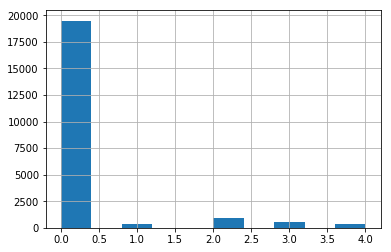

In [34]:
# next line is only for sandbox:
df_clean = pd.DataFrame()

# data field: sqft_living


orig_field = 'view'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = np.where(df_raw[orig_field].isna(), 0, df_raw[orig_field])
print("replaced mising values with 0")

df_clean.describe()
df_clean[orig_field].hist()

0 missing values in condition
0% missing values in condition
5 unique count
21592 non-unique count




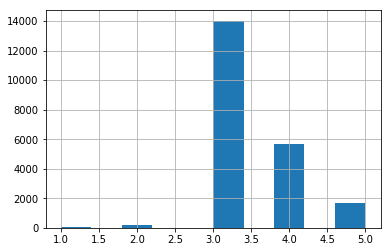

In [35]:
# next line is only for sandbox:
df_clean = pd.DataFrame()

# data field: sqft_living


orig_field = 'condition'

num_missing = len(df_raw[df_raw[orig_field].isna()])
n = len(df_raw)
unique_count = len(df_raw[orig_field].unique())

print(str(num_missing) + ' missing values in ' + orig_field)
print("{0:.00%} missing values in {1}".format(num_missing/n, orig_field))
print("{} unique count".format(unique_count))
print("{} non-unique count".format(n-unique_count))
print('\n')

df_clean[orig_field] = df_raw[orig_field]
#df_clean[orig_field] = np.where(df_raw[orig_field].isna(), 0, df_raw[orig_field])
#print("replaced mising values with 0")

df_clean.describe()
df_clean[orig_field].hist()